# Auto FRAP Calculator  (A.F.C.)
Designed by Hao Wang $$ $$
Version 2.4 --last update 2023-Feb-10$$ $$
Email harrywang11@126.com for any problem

In [1]:
# not so necessary imports
import serial # pip install pyserial
import time
#import serial.tools.list_ports
import cv2 # pip install opencv-python
import os
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pyfirmata #pip install pyfirmata
import pylab
import pandas as pd
import numpy as np
import IPython.display as ipd
from datetime import datetime
import imageio

import imageio
import scipy.ndimage as ndi
from skimage import io
from PIL import Image

In [2]:
# bette display
def array_to_html(arr, row_names=None, col_names=None, title=None):
    ''' array_to_html, if placed at the end of a Anaconda cell, will
        display the array in html.   It uses pandas.
    '''
    if len(arr.shape) not in [1, 2]:
        print('The array must be a one- or two-dimensional array. This array is',
             len(arr.shape), 'dimensions')
        return

    if title:
        ipd.display(ipd.HTML('<h1>' + title + '</h1>'))
    df = pd.DataFrame(arr, index=row_names, columns=col_names)
    return ipd.display(ipd.HTML(df.to_html()))

In [ ]:
# get file name
file_name_c = "no flow 1.oir.tif"
control = io.imread(file_name)

In [3]:
file_name = "6cmflow1C_0001_LSM.tif"
im = io.imread(file_name)
im.shape

print(np.max(im[3]))

3277


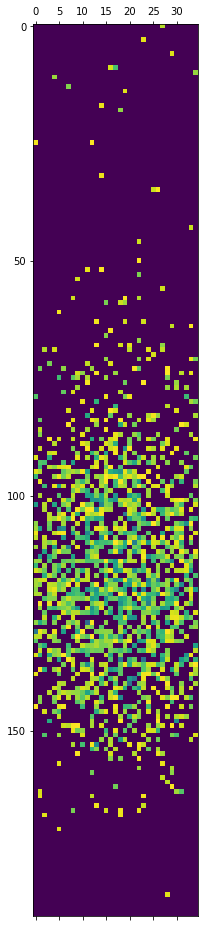

In [99]:
# pick the location and thresholding
x=im[1].copy()
t1 = x[90:280,150:185].copy()
t2 = x[90:280,355:390].copy()
t1[t1>800] = 0
t1=np.array(t1)
t2=np.array(t2)
t2[t2>800] = 0
tt=x[90:280,150:185]
tt=np.array(tt)
#tt[t1>0]=5000
x[90:280,150:185]=tt
plt.matshow(t1)

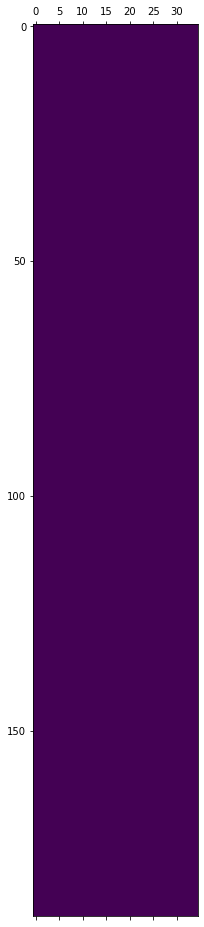

In [94]:
x=im[1].copy()
t1 = x[90:280,150:185].copy()
t2 = x[90:280,355:390].copy()
#t1[t1>800] = 0
t1=np.array(t1)
t2=np.array(t2)
t2[t2>800] = 0
tt1=x[90:280,150:185]
tt1=np.array(tt1)
tt1[t1>0]=5000
x[90:280,150:185]=tt1
tt2=x[90:280,355:390]
tt2=np.array(tt1)
tt2[t1>0]=5000
x[90:280,355:390]=tt2
plt.matshow(t1)


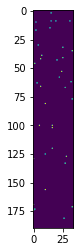

In [255]:
ll1 = []
ll2=[]
for i in range(2,30):
    current = im[i].copy()
    x = current[90:280,150:185]
    x2 = current[90:280,355:390]
    x[x>1100] = 0
    x2[x2>1100] = 0
    cy1, cx1 = ndi.center_of_mass(x)
    cy2, cx2 = ndi.center_of_mass(x2)
    #print(cy1)
    ll1.append(cy1)
    ll2.append(cy2)
    plt.imshow(x2)

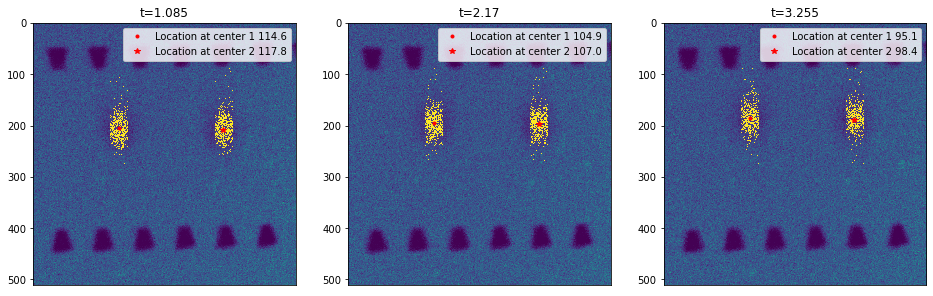

In [4]:
# ploting
fig1 = plt.figure(figsize=(16,9))
ax1 = plt.subplot(1,3,1)
ax1.get_xaxis().set_visible(False)
plt.title('t=1.085')
x=im[1].copy()
# pick location and thershold
t1 = x[90:280,150:185]
t2 = x[90:280,355:390]
t1=np.array(t1)
t1[t1>800] = 0
cy1, cx1 = ndi.center_of_mass(t1)
t2=np.array(t2)
t2[t2>800] = 0
tt1=x[90:280,150:185]
tt1=np.array(tt1)
tt1[t1>0]=5000
x[90:280,150:185]=tt1
tt2=x[90:280,355:390]
tt2=np.array(tt1)
tt2[t1>0]=5000
x[90:280,355:390]=tt2
# get center of mass
cy2, cx2 = ndi.center_of_mass(t2)
ax1.matshow(x)
plt.plot(cx1+150,cy1+90,'r.')
#print(cy2,cx2)
plt.plot(cx2+355,cy2+90,'r*')
plt.legend(['Location at center 1 '+str(round(cy1, 1)),'Location at center 2 '+str(round(cy2, 1))])

# repeat last one
ax2 = plt.subplot(1,3,2)
ax2.get_xaxis().set_visible(False)
plt.title('t=2.17')
x=im[2].copy()
t1 = x[90:280,150:185]
t2 = x[90:280,355:390]
t1=np.array(t1)
t1[t1>800] = 0
cy1, cx1 = ndi.center_of_mass(t1)
t2=np.array(t2)
t2[t2>800] = 0
tt1=x[90:280,150:185]
tt1=np.array(tt1)
tt1[t1>0]=5000
x[90:280,150:185]=tt1
tt2=x[90:280,355:390]
tt2=np.array(tt1)
tt2[t1>0]=5000
x[90:280,355:390]=tt2
cy2, cx2 = ndi.center_of_mass(t2)
ax2.matshow(x)
plt.plot(cx1+150,cy1+90,'r.')
#print(cy2,cx2)
plt.plot(cx2+355,cy2+90,'r*')
plt.legend(['Location at center 1 '+str(round(cy1, 1)),'Location at center 2 '+str(round(cy2, 1))])


ax3 = plt.subplot(1,3,3)
ax3.get_xaxis().set_visible(False)
plt.title('t=3.255')
x=im[3].copy()
t1 = x[90:280,150:185]
t2 = x[90:280,355:390]
t1=np.array(t1)
t1[t1>800] = 0
cy1, cx1 = ndi.center_of_mass(t1)
t2=np.array(t2)
t2[t2>800] = 0
tt1=x[90:280,150:185]
tt1=np.array(tt1)
tt1[t1>0]=5000
x[90:280,150:185]=tt1
tt2=x[90:280,355:390]
tt2=np.array(tt1)
tt2[t1>0]=5000
x[90:280,355:390]=tt2
cy2, cx2 = ndi.center_of_mass(t2)
ax3.matshow(x)
plt.plot(cx1+150,cy1+90,'r.')
#print(cy2,cx2)
plt.plot(cx2+355,cy2+90,'r*')
plt.legend(['Location at center 1 '+str(round(cy1, 1)),'Location at center 2 '+str(round(cy2, 1))])

# ax4 = plt.subplot(2,3,4)
# plt.imshow(im[1])
# ax4.get_xaxis().set_visible(False)
# ax5 = plt.subplot(2,3,5)
# ax5.get_xaxis().set_visible(False)
# plt.imshow(im[2])
# ax6 = plt.subplot(2,3,6)
# ax6.get_xaxis().set_visible(False)
# plt.imshow(im[3])
plt.savefig('FRAP example.pdf',dpi=300,)

In [28]:
llc = [ll1[:6],ll2[:6]]
llc = np.array(llc)
llc = np.transpose(llc)
plt.plot(llc)

NameError: name 'll1' is not defined

In [258]:
array_to_html(llc)

,0,1
0,112.657771,86.504707
1,102.978620,72.513313
2,100.404598,58.741975
3,100.577802,48.150144
4,108.351537,36.664529
5,125.005512,32.258861
